# Model machine learning sederhana rock paper scissors


## Charles Dometian

### Mengimport semua library yang dibutuhkan

In [38]:
#memanggil library untuk mengekstrak file zip
import zipfile

#untuk membuat direktori baru
import os

#untuk mengolah gambar ke array
import PIL

#untuk mengolah lebih banyak gambar
from PIL import Image, ImageOps #untuk mengubah ke gray scale

#untuk mengubah ke array
import numpy as np

#memanggil tensorflow untuk machine learning
import tensorflow as tf
print(tf.__version__)

#memanggil libarry untuk menampilkan gambar yang akan diidentifikasi
from IPython.display import Image

2.14.0


### Membuat direktori baru dan mendefinisikannya

In [2]:
#membuat direktori baru bernama dataset
os.mkdir('dataset')

#mendefinisikan dataset menjadi dataset_dir untuk memudahkan dalam pemanggilan folder
dataset_dir = 'dataset'

### Melakukan ekstrak pada dataset

In [3]:
#mendefinisikan rockpaperscissors menjadi target_file yang akan di ekstrak
target_file = 'rock-paper-scissors.zip'

#memanggil library dari zipfile dengan 'zipfile' dan memanggil fungsi untuk mengekstrak dengan 'ZipFile'
extracting = zipfile.ZipFile(target_file,'r')

#melakukan ekstrak pada file yang dikenakan dan disimpan pada parameter yang dimasukan dalam kasus ini disimpan di dataset_dir
extracting.extractall(dataset_dir)

#mengakhiri proses ekstrak
extracting.close()

### Mendefinisikan folder rock-paper-scissors

In [4]:
#mendefinisikan folder rock, paper, scissors untuk memudahkan dalam pemanggilan folder dari rock, paper, dan scissors
rock_dir = os.path.join(dataset_dir, 'rock')
paper_dir = os.path.join(dataset_dir, 'paper')
scissors_dir = os.path.join(dataset_dir, 'scissors')

### Melihat attribute yang ada dalam folder rock-paper-scissors

In [5]:
#menunjukkan nama-nama file apa saja yang berada di dalam folder rock, paper, dan scissors (Opsional)
print('Berikut tampilan nama-nama file dari folder rock :')
os.listdir(rock_dir)

Berikut tampilan nama-nama file dari folder rock :


['00nKV8oHuTGi20gq.png',
 '01dM3ewPIsnBICu1.png',
 '02vG75hQW9Vp4oTl.png',
 '0bioBZYFCXqJIulm.png',
 '0NDYNEoDui7o64gU.png',
 '0OEXfEooCXlljaEl.png',
 '0P6uxM8Vr1DwySHe.png',
 '19H63c0MWD56EWNq.png',
 '1BqjHe5igJAgUjiN.png',
 '1COBZEE1ALiJIivQ.png',
 '1DxbXT3M2qiMjCmC.png',
 '1e1VCnCEApnFh9Oo.png',
 '1mnAKQCHEDbtjPX2.png',
 '1MOm36DHK0R8OfIC.png',
 '1UucZqS3qblvU0cH.png',
 '1UXuUYJ4rVj2eSvt.png',
 '1VoYiUgPE6h45MLu.png',
 '1vvcitV1s17gKdbn.png',
 '1wk2Hl1Ih9guOwx6.png',
 '1WuMUpzupKs67q29.png',
 '2affjOmZChc9AXpR.png',
 '2DdERUV7Te8ivywq.png',
 '2EAkMCm7ZLnNoBQ7.png',
 '2f25VA1nfxiC86xj.png',
 '2HSPQEteONUjEXAF.png',
 '2j9iOcnxJzcyaFB5.png',
 '2JRYQXb5kmlhgD5i.png',
 '2MKZD0VUw7Tez2Jx.png',
 '2NmrcDGkc7FQuu12.png',
 '2nSUlcvPf1DOCo1j.png',
 '2O9XPBJRT119drWX.png',
 '2Pt5UNQkMzXLtbEp.png',
 '2UaJz6Z3xJv3WX9h.png',
 '2uVMdMj10yjpR6Py.png',
 '2uxDLQKemRqulhIx.png',
 '2vwLOZSd8FCXbuck.png',
 '32PDtFdAkUiAJbmP.png',
 '337ARHTZmhCSkoEM.png',
 '3aRXheNUQ6cxechp.png',
 '3k7WrSAInCaatFtl.png',


In [ ]:
print('Berikut tampilan nama-nama file dari folder paper :')
os.listdir(paper_dir)

In [ ]:
print('Berikut tampilan nama-nama file dari folder scissors :')
os.listdir(scissors_dir)

In [6]:
#menampilkan banyaknya jumlah data pada folder rock, paper, scissors
print('Banyaknya data dari folder rock : ')
len(os.listdir(rock_dir))

Banyaknya data dari folder rock : 


726

In [7]:
print('Banyaknya data dari folder paper : ')
len(os.listdir(paper_dir))

Banyaknya data dari folder paper : 


712

In [8]:
print('Banyaknya data dari folder scissors : ')
len(os.listdir(scissors_dir))

Banyaknya data dari folder scissors : 


750

### Mendefinisikan fungsi

In [11]:
#membuat fungsi untuk mengubah gambar menjadi array
def imgToArray(filename):
    image = Image.open(filename)
    image_grayscale = ImageOps.grayscale(image)
    image_grayscale = image_grayscale.resize(size = (150,150)) #berfungsi untuk mengkonversi panjang dari arraynya yang sebelumnya 200x300 dibuat menjadi 150x150 saja
    image_array = np.array(image_grayscale)
    image_array = image_array/255 #dibagi 5 karena standar nilai index gambar biasa itu rangenya dari 0 - 255
    
    #untuk membuat tampilan index menjadi memanjang saja atau satu array, tidak melebar ke bawah membuat banyak array
    list_full = []
    for single_list in image_array:
        list_full.extend(single_list)
    return np.array(list_full)

'''
CATATAN : Pada return np.array(list_full) bisa ditambahkan .shape untuk mengetahui ukuran pixel dan array pada gambar atau ukuran luas dari sebuah pixel gambar. 
Jika tidak memakai .shape maka hasil yang akan keluar adalah nilai dari green, red, dan bluenya.
'''

'\nCATATAN : Pada return image_array bisa ditambahkan .shape untuk mengetahui ukuran pixel dan array pada gambar. \nJika tidak memakai .shape maka hasil yang akan keluar adalah nilai dari green, red, dan bluenya.\n'

### Melakukan proses one hot encoding pada folder rock-paper-scissors

In [14]:
#proses penglabelan data pada rock, paper, dan scissors direktori
data = []
label = []

for filename in os.listdir(rock_dir):
    image_path = os.path.join(rock_dir, filename)
    image_array = imgToArray(image_path)
    data.append(image_array)
    label.append([1,0,0])

for filename in os.listdir(paper_dir):
    image_path = os.path.join(paper_dir, filename)
    image_array = imgToArray(image_path)
    data.append(image_array)
    label.append([0,0,1])

for filename in os.listdir(scissors_dir):
    image_path = os.path.join(scissors_dir, filename)
    image_array = imgToArray(image_path)
    data.append(image_array)
    label.append([0,1,0])
    
data = np.array(data)
label = np.array(label)

### Melakukan pemanggilan dan pengujian pada folder dan gambar

In [10]:
#mencoba menampilkan nama gambar dari folder rock pada index 0
print(os.listdir(rock_dir)[0])

00nKV8oHuTGi20gq.png


In [13]:
#mencoba menampilkan hasil pengindexan dari salah satu gambar
print(imgToArray(os.path.join(rock_dir, '00nKV8oHuTGi20gq.png')))

[0.34901961 0.3372549  0.34509804 ... 0.34509804 0.3372549  0.3372549 ]


In [18]:
#menampilkan total gambar dan panjang array
print(data.shape)
print(label.shape)

(2188, 22500)
(2188, 3)


### Melatih model jaringan saraf tiruan

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape=[22500], activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    metrics = ['acc'],
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
)

model.fit(
    data,
    label,
    epochs = 20)

Epoch 1/20
69/69 [==============================] - 2s 16ms/step - loss: 1.8395 - acc: 0.4141
Epoch 2/20
69/69 [==============================] - 1s 15ms/step - loss: 1.2144 - acc: 0.5155
Epoch 3/20
69/69 [==============================] - 1s 15ms/step - loss: 1.1320 - acc: 0.5494
Epoch 4/20
69/69 [==============================] - 1s 15ms/step - loss: 1.2284 - acc: 0.5297
Epoch 5/20
69/69 [==============================] - 1s 15ms/step - loss: 0.9295 - acc: 0.6348
Epoch 6/20
69/69 [==============================] - 1s 15ms/step - loss: 0.9723 - acc: 0.5951
Epoch 7/20
69/69 [==============================] - 1s 15ms/step - loss: 0.9375 - acc: 0.6321
Epoch 8/20
69/69 [==============================] - 1s 15ms/step - loss: 0.8921 - acc: 0.6444
Epoch 9/20
69/69 [==============================] - 1s 16ms/step - loss: 1.0485 - acc: 0.6010
Epoch 10/20
69/69 [==============================] - 1s 16ms/step - loss: 0.9640 - acc: 0.6303
Epoch 11/20
69/69 [==============================] - 1s 15m

### Melakukan pegujian pada gambar yang akan diprediksi

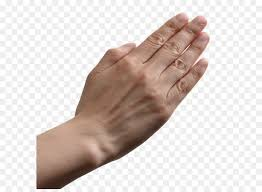

In [37]:
# Nama file gambar
sample_image = 'test.jpg'

# Menampilkan gambar
Image(filename=sample_image)

In [31]:
sample_image_array = imgToArray(sample_image)

In [35]:
model.predict(np.array([sample_image_array]))

hasil = np.array([sample_image_array])
# Menentukan indeks nilai tertinggi
indeks_nilai_tertinggi = np.argmax(hasil)

# Menentukan hasil berdasarkan indeks nilai tertinggi
if indeks_nilai_tertinggi == 0:
    print("Ini adalah Batu")
elif indeks_nilai_tertinggi == 1:
    print("Ini adalah Gunting")
else:
    print("Ini adalah Kertas")

1/1 [==============================] - 0s 55ms/step
Ini adalah Kertas
